# Алгоритмы классификации (продолжение)

In [1]:
# применить решающий лес
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# нарисовать график зависимости ошибки перекрестной проверки на тестовой части от числа деревьев (n_estimators). 
# Что означают и как влияют параметры criterion, max_depth, min_samples_split, min_samples_leaf ?

In [3]:
import numpy as np
import csv
import pylab as plt
%matplotlib inline

In [4]:
import numpy as np

train_values = []
train_data_arr = []
a = False

infile = open('train.csv', 'r')
import csv
for row in csv.reader(infile):
    if a:
        train_values.append(row[0])
        train_data_arr.append(row[1:])
    a = True
infile.close()

for r in range(len(train_values)):
    train_values[r] = int(train_values[r])

train_data = []
for i in range(len(train_data_arr)):
    train_data.append(np.zeros((28, 28)))
    for count1 in range(28):
        for count2 in range(28):
            train_data[i][count1][count2] = int(train_data_arr[i][count1*28 + count2])

In [5]:
train_data_ravel = []
for count in range(1000):
    train_data_ravel.append(train_data[count].ravel())

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs

means_cvs = [0]

for count in range(1, 200, 5):
    rfc = RandomForestClassifier(n_estimators=count)
    scores = cvs(rfc, train_data_ravel[:1000], train_values[:1000], cv=10)
    means_cvs.append(1 - scores.mean())

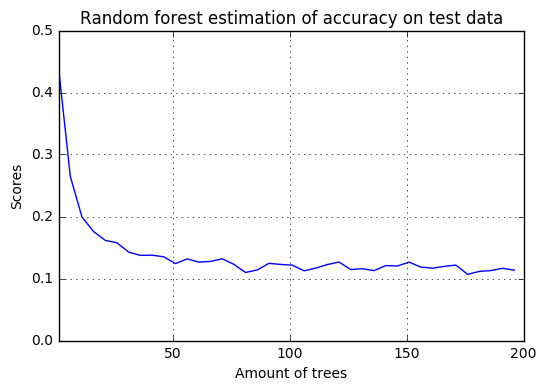

Final mistake =  0.106720822294  Amount of trees is 185


In [9]:
x_arr = [0]
for count in range(1, 200, 5):
    x_arr.append(count)
plt.title("Random forest estimation of accuracy on test data")
plt.xlim([1, 200])
plt.ylim([0, 0.5])
plt.plot(x_arr, means_cvs)
plt.ylabel("Scores")
plt.xlabel("Amount of trees")
plt.grid()
plt.show()

print("Final mistake = ", min(means_cvs[1:]), " Amount of trees is", 5*(means_cvs.index(min(means_cvs[1:])) + 1))

Параметр max_depth определяет максимальную высоту дерева. Параметр min_samples_split отвечает за количество элементов, необходимых для разделения внутреннего узла. Параметр min_samples_leaf есть минимальное число элементов в листьях дерева. Параметр criteria представляет собой функцию оценки качества разбиения. От параметра n_estimators зависит количество используемых деревьев.

In [2]:
# применить бустинг
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
# какие параметры и как влияют на качество классификации?

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score as cvs

gbc = GradientBoostingClassifier()
scores_cvs = cvs(gbc, train_data_ravel[:1000], train_values[:1000], cv=10)

In [12]:
print("Final mistake = ", 1 - scores_cvs.mean())

Final mistake =  0.145849055872


Параметр max_depth определяет максимальную высоту дерева. Параметр min_samples_split отвечает за количество элементов, необходимых для разделения внутреннего узла. Параметр min_samples_leaf есть минимальное число элементов в листьях дерева. Параметр criteria отвечает за меру расщипления, возможные значения параметра: "friedman_mse" - вычисление среднеквадратичной ошибки по Фридману, “mse” - вычисление простой среднеквадратичной ошибки, “mae” - вычисление абсолютной ошибки. От параметра n_estimators зависит количество используемых деревьев (100 в default)

In [3]:
# Сделайте выводы о лучшем методе, среди рассмотренных на занятии 2 и 3.

Эмпирическим путем было выявлено, что минимальная ошибка допускается при алгоритме классификации Random Forest (mistake equals to 0.146)

# Работа с бинарными изображениями
## с помощью библиотеки http://scikit-image.org

In [4]:
# бинаризовать изображения, привести примеры картинок
# http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html

In [7]:
from skimage.filters import threshold_mean

def make_binary(image):
    tm = threshold_mean(image)
    digit = image > tm
    return digit

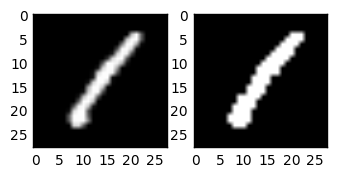

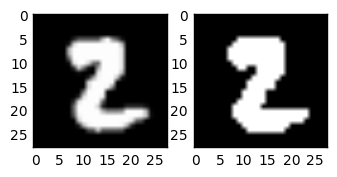

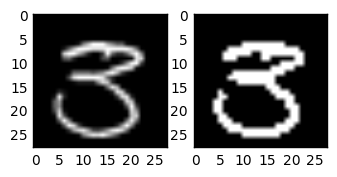

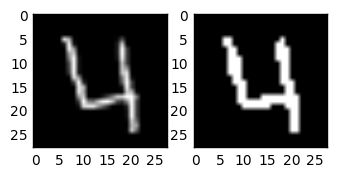

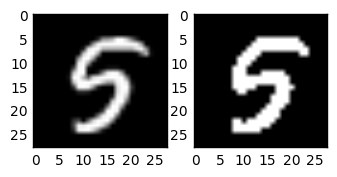

In [34]:
res = []
index = []

for count in range(1, 6):
    index = train_values.index(count)
    res.append(train_data_ravel[index])
    res.append(make_binary(train_data_ravel[index]))

j = 1
for i in range(0, 10, 2):
    plt.figure(figsize=(10, 5))
    for j in range(2):
        plt.subplot(2, 5, j + 1)
        plt.imshow(np.reshape(res[i + j], (28, 28)), cmap="gray")
    plt.show()

В левом столбце представлены оригинальные изображения цифр от 1 до 5, в правом - их бинарные версии.

In [5]:
# выбрать несколько типичных изображений цифр и несколько не типичных (разомнутую 6, не связные из-за шума и т.п.)
# применить к ним замыкание и размыкание в разных вариантах и порядке
# выбрать наилучший вариант визуально, применить его ко всей выборке
# http://scikit-image.org/docs/dev/api/skimage.morphology.html

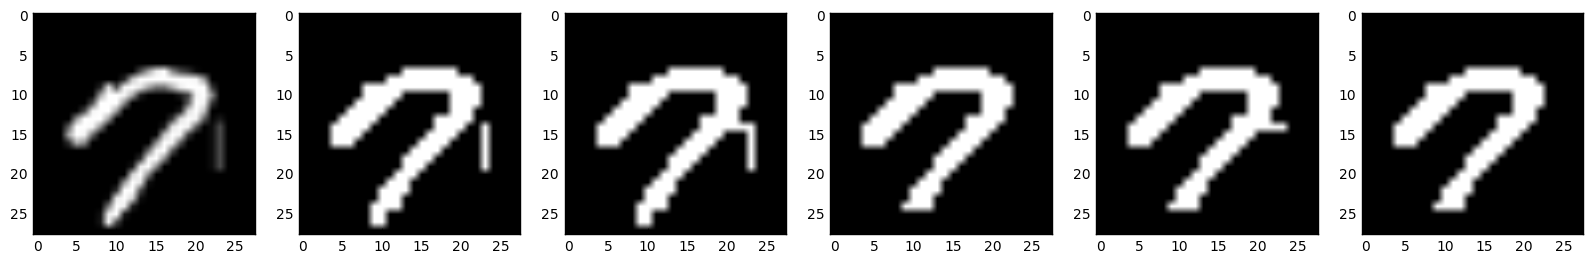

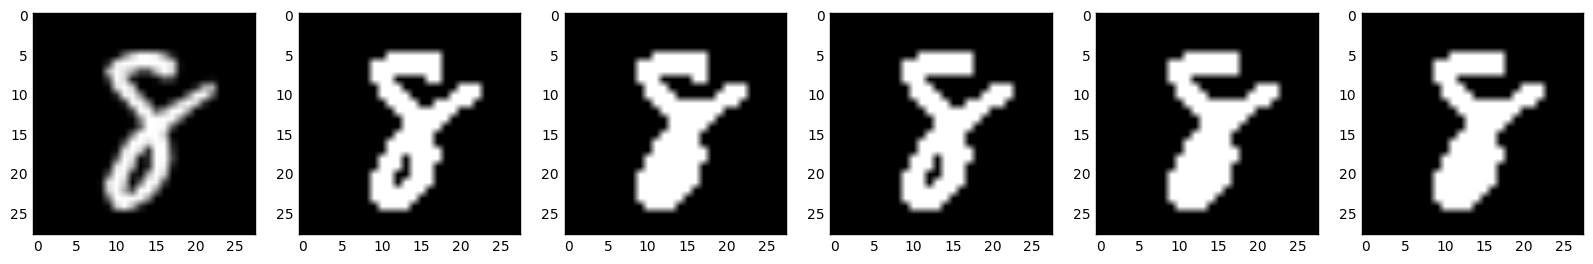

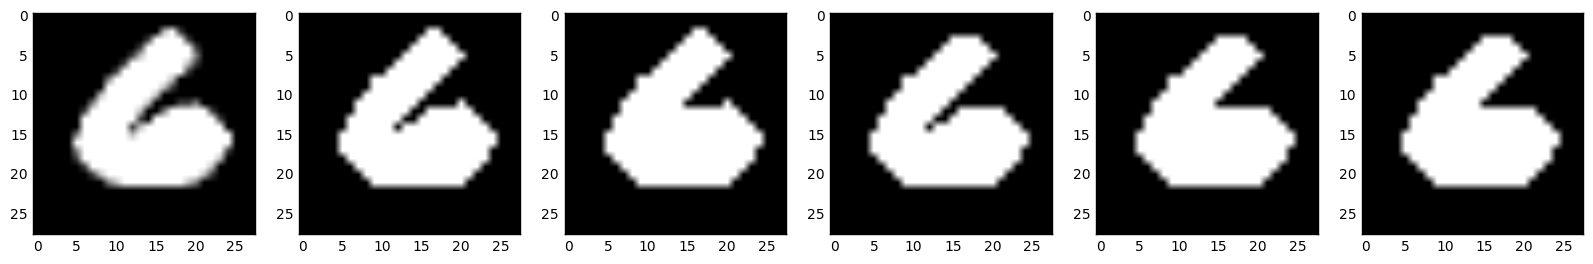

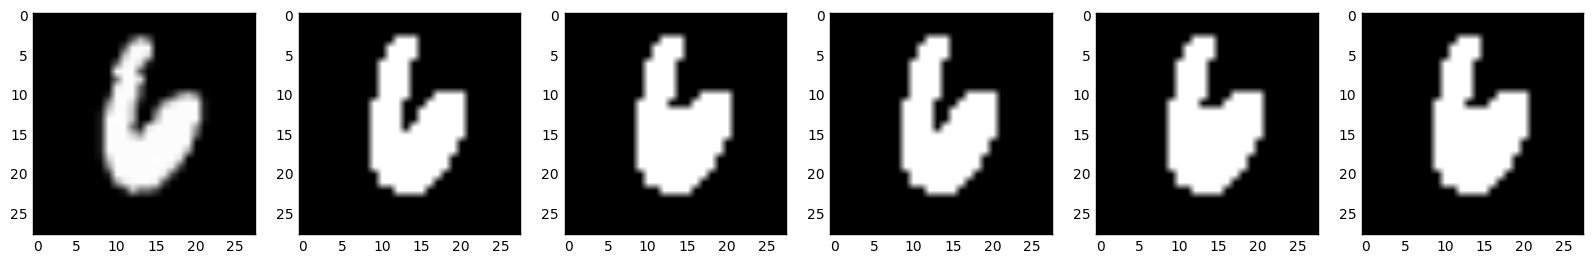

In [31]:
from skimage.morphology import binary_closing as bc
from skimage.morphology import binary_opening as bo

strange_images = [102, 300, 500, 505]
res = []

for count in strange_images:
    res.append(train_data_ravel[count])
    binary_im = make_binary(train_data_ravel[count])
    image_close = bc(binary_im)
    image_open = bo(binary_im)
    
    res.append(binary_im)
    res.append(image_close)
    res.append(image_open)
    res.append(bo(image_close))
    res.append(bc(image_open))
    
for i in range(0, 24, 6):
    plt.figure(figsize=(20, 10))
    for j in range(6):
        plt.subplot(2, 6, j + 1)
        plt.imshow(np.reshape(res[i + j], (28, 28)), cmap="gray")
    plt.show()

1 - оригинальная картинка;
2 - бинаризация;
3 - замыкание;
4 - размыкание;
5 - замыкание-размыкание;
6 - размыкание-замыкание

Кажется, что лучше всего с задачей справляется размыкание. Применим размыкание на выборке.

In [33]:
open_data = []

for i in train_data_ravel:
    open_data.append(bo(make_binary(i)))

In [6]:
# построить скелеты изображений
# визуально выбрать лучшие параметры (skeletonize, medial_axis)
# нарисовать примеры результатов

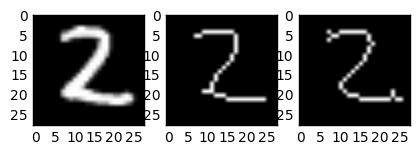

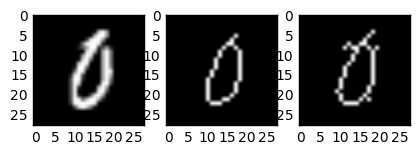

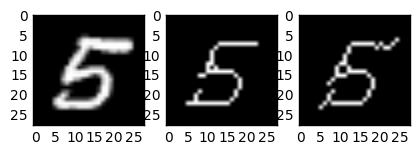

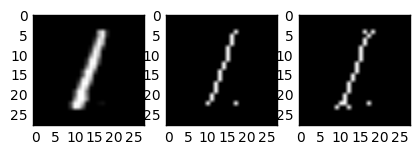

In [40]:
from skimage.morphology import skeletonize
from skimage.morphology import medial_axis

image_numbers = [101, 201, 301, 401]
images = []

for count in image_numbers:
    images.append(train_data_ravel[count])
    bin_img = make_binary(train_data_ravel[count])
    skel = skeletonize(np.reshape(bin_img, (28, 28)))
    medial = medial_axis(np.reshape(bin_img, (28, 28)))
    images.append(skel)
    images.append(medial)
    
for count in range(0, 12, 3):
    plt.figure(figsize=(10, 5))
    for j in range(3):
        plt.subplot(2, 6, j + 1)
        plt.imshow(np.reshape(images[count + j], (28, 28)), cmap="gray")
    plt.show()

In [7]:
# сгенерировать признаки по изображениям и их склетам (площадь, запас связности, ширина и т.д.)

In [ ]:
Сгнерируем признаки площади (space), ширины (width) и высоты (height)

In [82]:
def space(image):
    img = np.array(image).reshape(28, 28)
    space = 0
    
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j]:
                space += 1
    return space


def width(image):
    img = np.array(image).reshape(28, 28)
    
    left_col = 28
    right_col = 0
    
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j]:
                if j > right_col:
                    right_col = j
                if j < left_col:
                    left_col = j
    width = right_col - left_col + 1
    return width


def height(image):
    img = np.array(image).reshape(28, 28)
    
    lowest_row = 28
    highest_row = 0
    
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j]:
                if i > highest_row:
                    highest_row = i
                if i < lowest_row:
                    lowest_row = i
    height = highest_row - lowest_row + 1
    return height


In [8]:
# добавить ваши признаки к признаковому описанию и применить решающие дереья. Сравнить результат с результатом с занятия 2

In [110]:
ifile = open("train.csv", "r")

train_data = []
train_values = []

read = csv.reader(ifile)
next(read)

for row in read:
    num = []
    for i in row[1:]:
        num.append(int(i))
    train_data.append(num)
    for i in row[0]:
        train_values.append(int(i))

In [140]:
arr_data = []

for count in train_data[:1000]:
    arr_data.append(count)

for count in range(0, len(open_data)):
    skl = skeletonize(np.reshape(open_data[count], (28, 28)))
    arr_data[count].append(space(skl))    
    arr_data[count].append(width(skl))    
    arr_data[count].append(hight(skl))
    
    arr_data[count].append(space(open_data[count]))    
    arr_data[count].append(width(open_data[count]))    
    arr_data[count].append(hight(open_data[count]))   

In [142]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score as cvs

clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=1, 
                            max_depth=11, min_samples_split=2)
scores = cvs(clf, arr_data[1:1000], train_values[1:1000], cv=10)
print("Final mistake = ", 1 - scores.mean())

Final mistake =  0.32977648382


# Метод главных компонент

In [9]:
# найти среднее изображение

In [145]:
ifile = open("train.csv", "r")

train_data = []
train_values = []

read = csv.reader(ifile)
next(read)

for row in read:
    num = []
    for i in row[1:]:
        num.append(int(i))
    train_data.append(num)
    for i in row[0]:
        train_values.append(int(i))

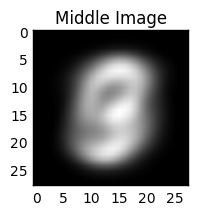

In [148]:
middle = [np.zeros((28, 28)) for i in range(10)]
my_range = [0 for i in range(10)]
fa = np.zeros((28, 28))
aa = 0

for count in range(len(train_values)):
    fa += np.reshape(train_data[count], (28, 28))
    aa += 1
    middle[train_values[count]] += np.reshape(train_data[count], (28, 28))
    my_range[train_values[count]] += 1
    
plt.figure(figsize=(2, 2))
fa /= aa
plt.title("Middle Image")
plt.imshow(fa, cmap="gray")

In [10]:
# вычислить матрицу выборочной ковариации (сигма). Каково она размера?

Матрицу сигма найдём с помощью сингулярного разложения

In [151]:
from scipy.linalg import svd

U,s,Vt = svd(fa, full_matrices=False)
print("Matrix size =", s.shape[0])

Matrix size = 28


In [11]:
# вычислить собственные векторы и собственные числа матрицы сигма. 
# Упорядочить их так, чтобы они располагались в порядке невозрастания собственных чисел,
# а собственные векторы были расположены по столбцу

Вычислим собственные векторы:

In [156]:
M = np.cov(fa.T) 
e_vals, e_vecs = np.linalg.eig(M)
par = [[] for i in range(28)]

for i in range(28):
    for j in range(28):
        par[i].append(e_vecs[j][i])
print(e_vecs)

[[ -6.46429274e-06   3.29099644e-05  -8.21477872e-05   8.32817500e-05
   -1.08792819e-05  -1.20784515e-04  -1.01435078e-03  -8.73414241e-04
   -2.03935333e-03  -1.06085781e-03   4.02848379e-03   1.24393750e-03
    2.84313322e-03   8.60048258e-04  -3.06942024e-03  -5.47298840e-03
   -4.95903860e-03  -9.96802997e-03  -1.23477715e-02   1.57244323e-02
   -4.74943558e-02   6.08748671e-02  -3.87449631e-02   4.63520791e-02
    1.28734643e-01   7.42771188e-03  -9.67051650e-01  -1.94845766e-01]
 [ -7.75146532e-05   3.32825117e-04  -6.09033895e-04   9.52495096e-04
   -1.59906045e-04  -9.78733659e-04   1.80901216e-03  -1.01271017e-02
   -7.86302506e-03  -3.22535964e-03   1.85090569e-02   7.75075740e-03
   -1.10390503e-02  -3.78036763e-03   1.74985654e-02  -1.63347493e-03
   -1.26935973e-02  -1.13190065e-02   1.36793790e-02   3.18288614e-02
   -4.22354632e-02  -7.54785965e-02   5.22461402e-02  -3.48996568e-01
    4.00477058e-01   1.31242932e-01  -1.31632422e-01   8.18868601e-01]
 [ -6.72484963e-04

In [157]:
print(par)

[[-6.4642927440468706e-06, -7.7514653178718893e-05, -0.0006724849631679898, -0.0034430226875324238, -0.013573089189722779, -0.038489415095046817, -0.076531162940448469, -0.12469329488002555, -0.17684171950287669, -0.22199303002865264, -0.25021832469900945, -0.26294311867873349, -0.27448622896062336, -0.29643294055203778, -0.31795428676496973, -0.330768066035383, -0.33060184272500998, -0.31853759747705451, -0.28378929475312858, -0.22855659671080564, -0.16784000611763547, -0.11333074508065541, -0.069269203533995835, -0.036394814535907247, -0.014437936677345638, -0.003573019194450269, -0.00060001560810750388, -4.1386409694461638e-05], [3.2909964441656751e-05, 0.00033282511689384646, 0.00073685279204296808, -0.002445179048461749, -0.011015413481620325, -0.026421012239652049, -0.050600661920975232, -0.073040893264722559, -0.088484485545793259, -0.10523306863833665, -0.14946869897800033, -0.22912109419856941, -0.30858524060340037, -0.31942643498503526, -0.24243918080796986, -0.08638576251774

In [12]:
# по графику кумулятивной суммы собственных чисел дать рекомендации по выбору размерности (0.9; 0.95; 0.99)

Построим график в зависимости от размерности после подсчета комулятивной суммы, найдем оптимальные значения:

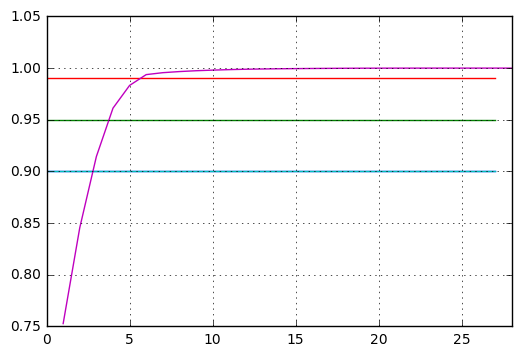

For 0.9 optimal dimension equals to 2
For 0.95 optimal dimension equals to 3
For 0.99 optimal dimension equals to 5


In [164]:
m_sum = sum(s)
var = [k for k in sorted(s, reverse=True)]
cum_var = np.cumsum(var) / m_sum

    
dim = [0, 0, 0]
nums = [0.9, 0.95, 0.99]

for i in range(1, len(cum_var)):
    if dim[0] == 0 and cum_var[i] > nums[0]:
        dim[0] = i
    if dim[1] == 0 and cum_var[i] > nums[1]:
        dim[1] = i
    if dim[2] == 0 and cum_var[i] > nums[2]:
        dim[2] = i

plt.xlim([0, 28])
plt.plot(range(28), [0.9]*28)
plt.plot(range(28), [0.95]*28)
plt.plot(range(28), [0.99]*28)
plt.plot(range(28), [0.9]*28)
plt.plot([i for i in range(1, 29)], cum_var)
plt.grid()
plt.show()

for i in range(3):
    print("For", nums[i], "optimal dimension equals to", dim[i])

In [13]:
# нарисовать проекции нескольких цифр на аффинные пространства реккомендованной размерности. 
# Нарисовать проекции на пространства меньшей и большей размерности

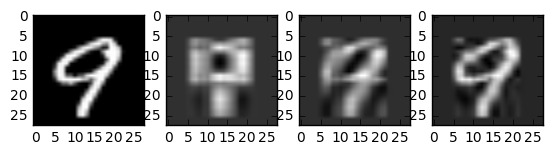

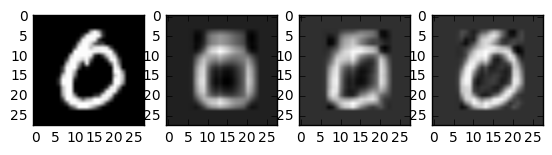

In [167]:
data = [100, 200]
res = []

for count in data:
    res.append(np.reshape(train_data[count], (28, 28)))
    for d in dim:
        U, Sig, V = svd(np.array(train_data[count]).reshape(28, 28), full_matrices=False)
        new_U = U[:,:d]
        new_V = V[:d,:]
        number = np.diagflat([Sig[:d]])
        res.append(np.dot(new_U, np.dot(number, new_V)))

for i in range(0, 8, 4):
    plt.figure(figsize=(10, 5))
    for j in range(4):
        plt.subplot(2, 6, j + 1)
        plt.imshow(res[i+j], cmap="gray")
    plt.show()

Номер столбца равен размерности, в четвертом столбце представлена размерность 5.

In [ ]:
# Применить решающие деревья к выборке меньшей размерности (признаки --- главные координаты)
# Как изменилось качество?

Применим Random Forest к первым 1000 изображениям из train_data:

In [170]:
from scipy.linalg import svd

data = [[], [], []]
for d in train_data[:1000]:
    k = 0
    for dim_cur in dim:
        U, Sig, V = svd(np.array(d).reshape(28, 28), full_matrices=False)
        new_U = U[:,:dim_cur]
        new_V = V[:dim_cur,:]
        number = np.diagflat([Sig[:dim_cur]])
        data[k].append(np.dot(new_U, np.dot(number, new_V)).reshape(28 * 28))
        k += 1

In [173]:
means = []

for i in range(3):
    clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=1, max_depth=12, min_samples_split=2)
    scores = cvs(clf, data[i], train_values[:1000], cv=10)
    means.append(1 - scores.mean())

In [178]:
for i in range(3):
    print("By the", dim[i], "dimension the mistake equals to", means[i])
print("An average mistake is", np.array(means).mean())

By the 2 dimension the mistake equals to 0.36265169847
By the 3 dimension the mistake equals to 0.342000831595
By the 5 dimension the mistake equals to 0.3577141005
An average mistake is 0.354122210188


In [180]:
clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=1, max_depth=11, min_samples_split=2)
scores = cvs(clf, train_data[:1000], train_values[:1000], cv=10)
print("Mistake with a \"free\" dimension equals to", 1 - scores.mean())

Mistake with a "free" dimension equals to 0.344703534104


Средняя ошибка после применения результатов исследования размерностей увеличилась, то есть качество ухудшилось.